### Observable Trends:

* Urban areas capture the great mayority of the Fares and Rides. 
* Urban drivers face more competition and smaller fares but those are compensated by much higher number of rides.
* Rural drivers face less competition but the demand for rides is significantly smaller. Fares are on average higher, probably due to rides involving longer distances

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_df = pd.read_csv(city_data_to_load, low_memory=False)
print(len(city_df["city"]))
print(len(city_df["city"].unique()))
city_df.head()

120
120


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df = pd.read_csv(ride_data_to_load, low_memory=False)
print(len(ride_df["city"]))
print(len(ride_df["city"].unique()))
print(len(ride_df["ride_id"].unique()))
ride_df.head()

2375
120
2375


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [5]:
combined_df = pd.merge(ride_df, city_df, on = "city")
print(len(combined_df["city"]))
print(len(combined_df["city"].unique()))
print(len(combined_df["ride_id"].unique()))
combined_df.head()

2375
120
2375


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
city_gpr_df = combined_df.groupby(['type','city','driver_count'])

In [7]:
city_results_df = pd.DataFrame(city_gpr_df['fare'].mean())

In [8]:
city_results_df = city_results_df.rename(columns={"fare":"AvgFare"})
city_results_df["TotalRides"] = city_gpr_df['ride_id'].count()
city_results_df.head()

AvgFare  TotalRides
type  city           driver_count                       
Rural Bradshawfurt   7             40.064000          10
      Garzaport      7             24.123333           3
      Harringtonfort 4             33.470000           6
      Jessicaport    1             36.013333           6
      Lake Jamie     4             34.358333           6

In [9]:
city_results_df = city_results_df.reset_index()
city_results_df.head()

,type,city,driver_count,AvgFare,TotalRides
0,Rural,Bradshawfurt,7,40.064000,10
1,Rural,Garzaport,7,24.123333,3
2,Rural,Harringtonfort,4,33.470000,6
3,Rural,Jessicaport,1,36.013333,6
4,Rural,Lake Jamie,4,34.358333,6


In [10]:
rural_df = city_results_df[["city","driver_count","AvgFare","TotalRides"]].loc[city_results_df["type"] == "Rural"]
suburban_df = city_results_df[["city","driver_count","AvgFare","TotalRides"]].loc[city_results_df["type"] == "Suburban"]
urban_df = city_results_df[["city","driver_count","AvgFare","TotalRides"]].loc[city_results_df["type"] == "Urban"]


In [11]:
print(city_results_df["TotalRides"].min(),",",city_results_df["TotalRides"].max())

3 , 39


In [12]:
print(city_results_df["AvgFare"].min(),",",city_results_df["AvgFare"].max())

20.093157894736848 , 43.278333333333336


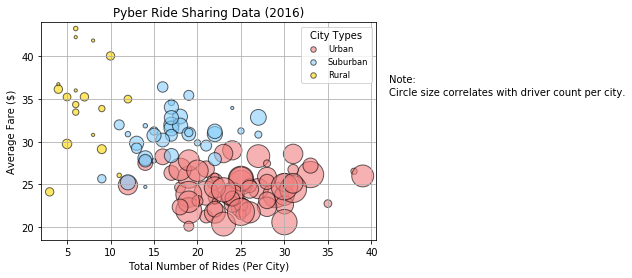

In [13]:
marker_factor = 10

rural_x_axis = rural_df["TotalRides"].values
rural_y_axis = rural_df["AvgFare"].values
rural_driver = rural_df["driver_count"].values * marker_factor

suburban_x_axis = suburban_df["TotalRides"].values
suburban_y_axis = suburban_df["AvgFare"].values
suburban_driver = suburban_df["driver_count"].values * marker_factor

urban_x_axis = urban_df["TotalRides"].values
urban_y_axis = urban_df["AvgFare"].values
urban_driver = urban_df["driver_count"].values * marker_factor

urban_handle = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors ="lightcoral", s=urban_driver, edgecolors="black", linewidths = 1, alpha = .6, label = "Urban")
suburban_handle = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors ="lightskyblue", s=suburban_driver, edgecolors="black", linewidths = 1, alpha = .6, label = "Suburban")
rural_handle = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors ="gold", s=rural_driver, edgecolors="black", linewidths = 1, alpha = .6, label = "Rural")

plt.xlim(2,40.5)
plt.ylim(18.5,44)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(loc = "best", title = "City Types", fontsize = "small")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.text(42,37,'Note:')
plt.text(42,35.5,'Circle size correlates with driver count per city.')
plt.grid()

plt.savefig("avg_fare_scatter.png")
plt.show()




## Total Fares by City Type

In [14]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [15]:
df = combined_df[["type","fare","ride_id"]].groupby(['type'])

In [16]:
total_df = round(df["fare"].sum()/combined_df["fare"].sum()*100,2)
total_df = total_df.reset_index()

In [17]:
type_input = total_df["type"].values
pie_pct = total_df.iloc[:,1].values
print(type_input)
print(pie_pct)
pie_colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


['Rural' 'Suburban' 'Urban']
[ 6.81 30.46 62.72]


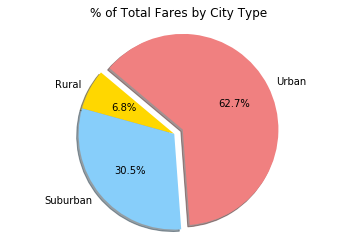

In [18]:
plt.pie(pie_pct, explode = explode, labels = type_input, colors = pie_colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.savefig("pct_fare_by_type_pie.png")
plt.show()




## Total Rides by City Type

In [19]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [20]:
total_df = round(df["ride_id"].count()/combined_df["ride_id"].count()*100,2)
total_df = total_df.reset_index()

In [21]:
type_input = total_df["type"].values
pie_pct = total_df.iloc[:,1].values
print(type_input)
print(pie_pct)

['Rural' 'Suburban' 'Urban']
[ 5.26 26.32 68.42]


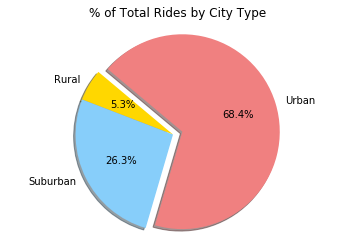

In [22]:
plt.pie(pie_pct, explode = explode, labels = type_input, colors = pie_colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.savefig("pct_rides_by_type_pie.png")
plt.show()



## Total Drivers by City Type

In [23]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [24]:
df2 = city_df.groupby(['type'])

In [25]:
total_df = round(df2["driver_count"].sum()/city_df["driver_count"].sum()*100,2)
total_df = total_df.reset_index()

In [26]:
type_input = total_df["type"].values
pie_pct = total_df.iloc[:,1].values
print(type_input)
print(pie_pct)

['Rural' 'Suburban' 'Urban']
[ 2.62 16.48 80.89]


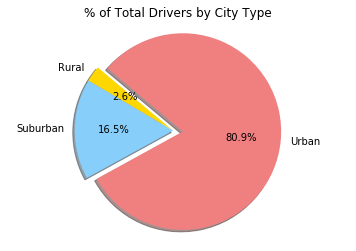

In [27]:
plt.pie(pie_pct, explode = explode, labels = type_input, colors = pie_colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.savefig("pct_drivers_by_type_pie.png")
plt.show()
